In [1]:
from google.colab import files

uploaded = files.upload()

Saving delirium_ml.xlsx to delirium_ml.xlsx


In [2]:
import pandas as pd

# If the file name is different, change it here.
filename = "delirium_ml.xlsx"
print("Uploaded files:", uploaded.keys())

df = pd.read_excel(filename)
df.head()

Uploaded files: dict_keys(['delirium_ml.xlsx'])


,SN,Gender,Age,ASA,Anesthesia,Height,Weight,BMI,HTN,DM,...,ICU,Pneumonia,DVT／PE,Postop Delirium,Preparation days,Postop Length of Stay,Frailty Index,Hct,Alb,Cre
0,1,2,84,2,2,161,62,23.918830,1,0,...,0,0,0,0,10,4,1,0.353,34.8,53
1,2,2,87,2,2,153,40,17.087445,1,0,...,0,0,0,0,7,17,4,0.259,29.3,61
2,3,2,74,2,2,162,65,24.767566,1,0,...,0,1,0,1,5,8,2,0.31,38.8,82
3,4,2,79,3,2,150,57,25.333333,0,1,...,0,0,0,0,2,5,1,0.409,38.7,88
4,5,1,77,2,2,167,50,17.928215,0,0,...,0,0,0,1,3,4,3,28.7,28.5,74


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SN                     245 non-null    int64  
 1   Gender                 245 non-null    int64  
 2   Age                    245 non-null    int64  
 3   ASA                    245 non-null    int64  
 4   Anesthesia             245 non-null    int64  
 5   Height                 245 non-null    int64  
 6   Weight                 245 non-null    int64  
 7   BMI                    245 non-null    float64
 8   HTN                    245 non-null    int64  
 9   DM                     245 non-null    int64  
 10  CAD                    245 non-null    int64  
 11  Stroke                 245 non-null    int64  
 12  Diagnosis              245 non-null    int64  
 13  Surgery                245 non-null    int64  
 14  DuraSurg               245 non-null    int64  
 15  DuraAn

In [4]:
# Columns that should be numeric but are stored as text
numeric_text_cols = ["Postop Length of Stay", "Hct", "Alb", "Cre"]

for col in numeric_text_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Fill missing numeric values with column medians
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda col: col.fillna(col.median()))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SN                     245 non-null    int64  
 1   Gender                 245 non-null    int64  
 2   Age                    245 non-null    int64  
 3   ASA                    245 non-null    int64  
 4   Anesthesia             245 non-null    int64  
 5   Height                 245 non-null    int64  
 6   Weight                 245 non-null    int64  
 7   BMI                    245 non-null    float64
 8   HTN                    245 non-null    int64  
 9   DM                     245 non-null    int64  
 10  CAD                    245 non-null    int64  
 11  Stroke                 245 non-null    int64  
 12  Diagnosis              245 non-null    int64  
 13  Surgery                245 non-null    int64  
 14  DuraSurg               245 non-null    int64  
 15  DuraAn

Delirium counts:
Postop Delirium
0    215
1     30
Name: count, dtype: int64

Delirium rate: 0.12244897959183673


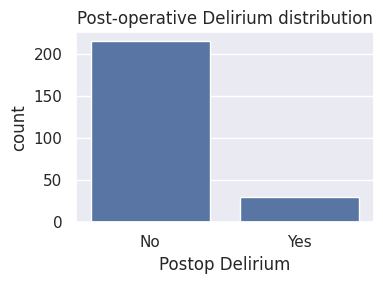

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

TARGET_COL = "Postop Delirium"

print("Delirium counts:")
print(df[TARGET_COL].value_counts())
print("\nDelirium rate:", df[TARGET_COL].mean())

plt.figure(figsize=(4,3))
sns.countplot(x=TARGET_COL, data=df)
plt.title("Post-operative Delirium distribution")
plt.xticks([0, 1], ["No", "Yes"])
plt.tight_layout()
plt.show()

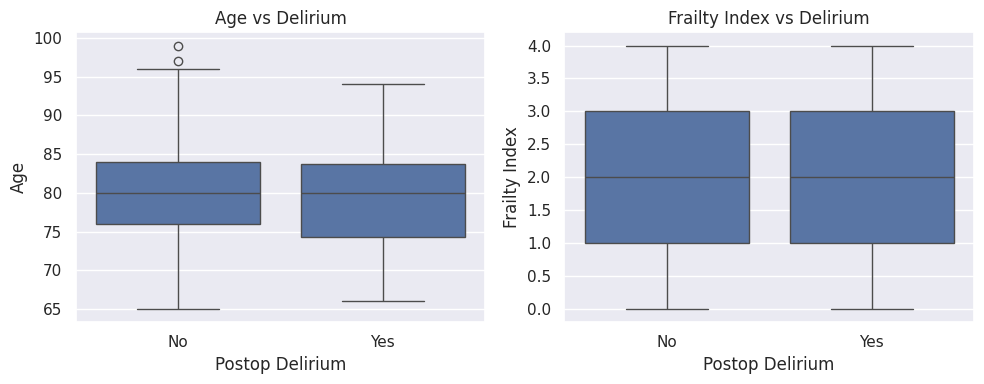

In [6]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot(x=TARGET_COL, y="Age", data=df)
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Age vs Delirium")

plt.subplot(1,2,2)
sns.boxplot(x=TARGET_COL, y="Frailty Index", data=df)
plt.xticks([0, 1], ["No", "Yes"])
plt.title("Frailty Index vs Delirium")

plt.tight_layout()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

TARGET_COL = "Postop Delirium"
ID_COL = "SN"   # patient ID we don’t use as feature

# Target
y = df[TARGET_COL].astype(int)

# Features = all columns except target + ID
feature_cols = [c for c in df.columns if c not in [TARGET_COL, ID_COL]]
X = df[feature_cols].copy()

print("Number of patients:", X.shape[0])
print("Number of features:", X.shape[1])

Number of patients: 245
Number of features: 35


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keep delirium rate similar in train & test
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)
print("Train delirium rate:", round(y_train.mean(), 3))
print("Test delirium rate:", round(y_test.mean(), 3))

Train size: (196, 35)
Test size: (49, 35)
Train delirium rate: 0.122
Test delirium rate: 0.122


In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    """
    Fits the model, prints ROC AUC, classification report,
    shows confusion matrix and ROC curve.
    """
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Some models (like SVM) need probability=True for predict_proba
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Fallback: use decision_function if available
        y_scores = model.decision_function(X_test)
        # Convert scores to 0-1 via min-max for ROC AUC
        import numpy as np
        y_proba = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min() + 1e-8)

    auc = roc_auc_score(y_test, y_proba)
    print(f"\n=== {name} ===")
    print("ROC AUC (test):", round(auc, 3))
    print("\nClassification report:\n", classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"{name} – Confusion Matrix (Test)")
    plt.tight_layout()
    plt.show()

    # ROC curve
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f"{name} – ROC Curve (Test)")
    plt.show()


=== Logistic Regression ===
ROC AUC (test): 0.779

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87        43
           1       0.36      0.83      0.50         6

    accuracy                           0.80        49
   macro avg       0.66      0.81      0.69        49
weighted avg       0.90      0.80      0.83        49



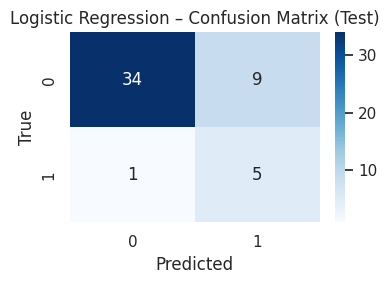

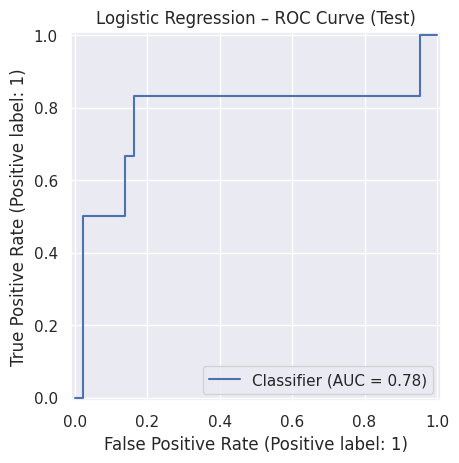

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",  # handle class imbalance
    solver="liblinear"
)

evaluate_model("Logistic Regression", log_reg, X_train_scaled, y_train, X_test_scaled, y_test)


=== Random Forest ===
ROC AUC (test): 0.597

Classification report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       0.00      0.00      0.00         6

    accuracy                           0.88        49
   macro avg       0.44      0.50      0.47        49
weighted avg       0.77      0.88      0.82        49



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


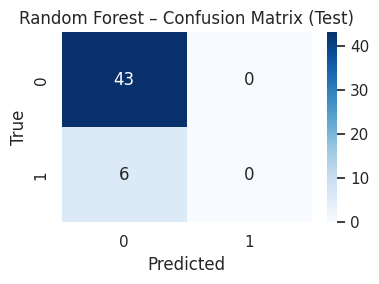

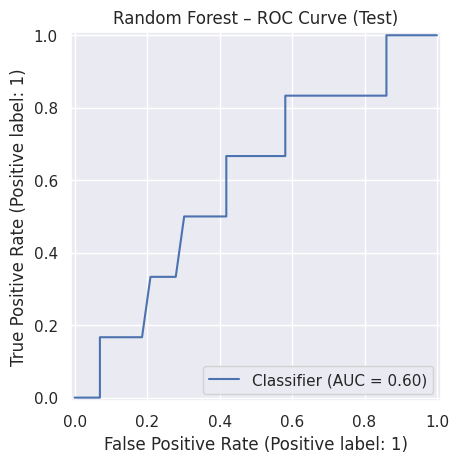

In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

evaluate_model("Random Forest", rf, X_train, y_train, X_test, y_test)


=== SVM (RBF) ===
ROC AUC (test): 0.694

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        43
           1       0.00      0.00      0.00         6

    accuracy                           0.82        49
   macro avg       0.43      0.47      0.45        49
weighted avg       0.76      0.82      0.79        49



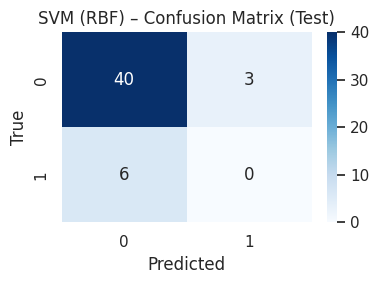

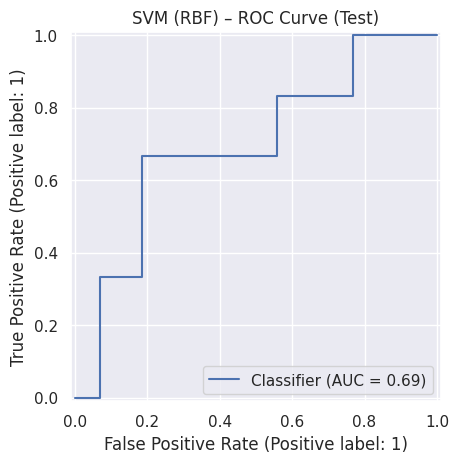

In [13]:
from sklearn.svm import SVC

svm = SVC(
    kernel="rbf",
    probability=True,       # so we get predict_proba for ROC
    class_weight="balanced",
    random_state=42,
    C=1.0,
    gamma="scale"
)

evaluate_model("SVM (RBF)", svm, X_train_scaled, y_train, X_test_scaled, y_test)


=== MLP Neural Network ===
ROC AUC (test): 0.802

Classification report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91        43
           1       0.00      0.00      0.00         6

    accuracy                           0.84        49
   macro avg       0.44      0.48      0.46        49
weighted avg       0.77      0.84      0.80        49



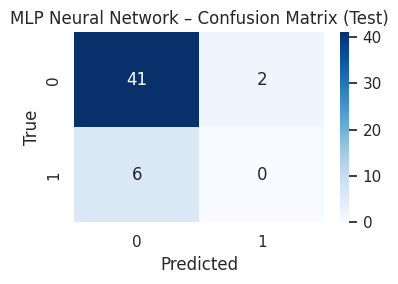

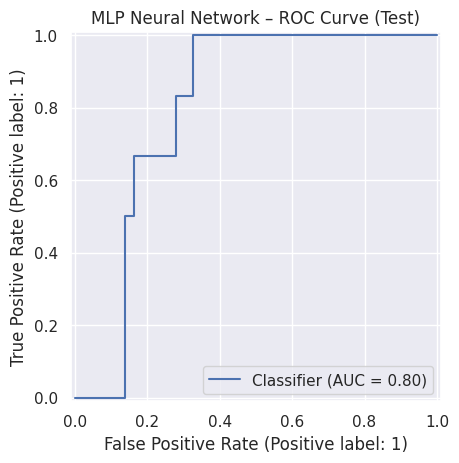

In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),  # two hidden layers
    activation="relu",
    alpha=0.001,                  # L2 regularization
    max_iter=1000,
    random_state=42,
    early_stopping=True
)

evaluate_model("MLP Neural Network", mlp, X_train_scaled, y_train, X_test_scaled, y_test)

In [15]:
import numpy as np

rf.fit(X_train, y_train)  # ensure it's fitted to full training set
importances = rf.feature_importances_

feat_imp = pd.DataFrame({
    "feature": feature_cols,
    "importance": importances
}).sort_values("importance", ascending=False)

feat_imp.head(15)

,feature,importance
32,Hct,0.065095
14,DuraAnes,0.058727
30,Postop Length of Stay,0.055318
21,Postop FFP,0.048428
33,Alb,0.047035
6,BMI,0.046160
13,DuraSurg,0.046006
34,Cre,0.045105
29,Preparation days,0.044479
15,Infusion,0.043627


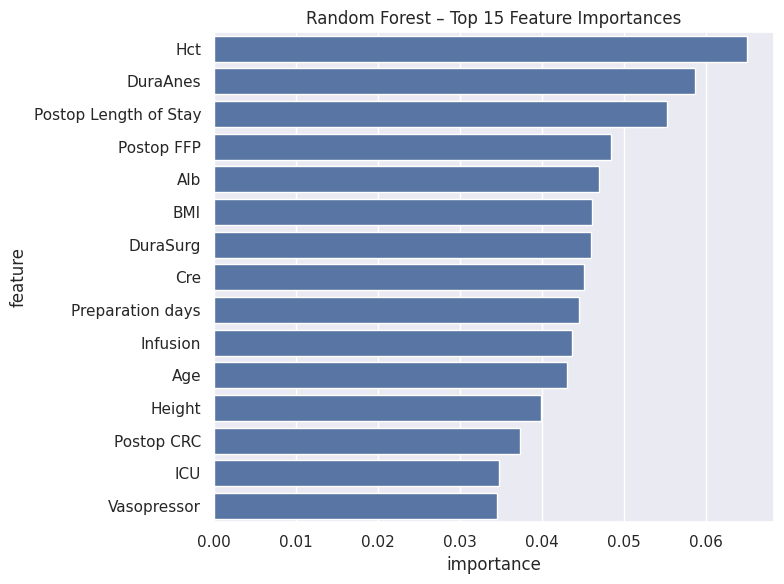

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=feat_imp.head(15),
    x="importance",
    y="feature"
)
plt.title("Random Forest – Top 15 Feature Importances")
plt.tight_layout()
plt.show()

In [17]:
log_reg.fit(X_train_scaled, y_train)
coef_lr = log_reg.coef_[0]

coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": coef_lr
}).sort_values("coefficient", ascending=False)

coef_df.head(10), coef_df.tail(10)

(                  feature  coefficient
 26                    ICU     0.947963
 20             Postop CRC     0.811867
 10                 Stroke     0.663999
 18            Intraop CRC     0.559985
 14               DuraAnes     0.559827
 21             Postop FFP     0.537955
 30  Postop Length of Stay     0.510327
 23   Postop Blood product     0.504942
 13               DuraSurg     0.497496
 32                    Hct     0.417189,
              feature  coefficient
 3         Anesthesia    -0.318288
 25       Vasopressor    -0.334738
 11         Diagnosis    -0.453284
 4             Height    -0.501285
 2                ASA    -0.507876
 29  Preparation days    -0.530160
 17      Urine Output    -0.674150
 0             Gender    -0.676644
 15          Infusion    -0.802548
 24     Blood product    -1.177491)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Total (2 components):", pca.explained_variance_ratio_.sum())

Explained variance ratio: [0.14171537 0.0862991 ]
Total (2 components): 0.22801447588659168


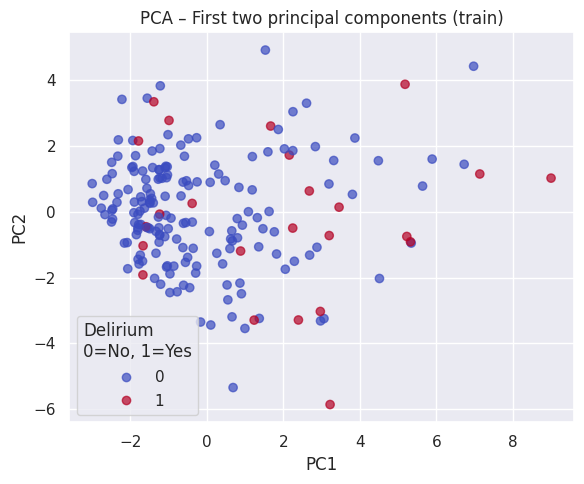

In [19]:
plt.figure(figsize=(6,5))
scatter = plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=y_train,
    cmap="coolwarm",
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – First two principal components (train)")
plt.legend(*scatter.legend_elements(), title="Delirium\n0=No, 1=Yes")
plt.tight_layout()
plt.show()

In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_train = kmeans.fit_predict(X_train_pca)

cluster_df = pd.DataFrame({
    "cluster": clusters_train,
    "delirium": y_train.values
})

cluster_summary = cluster_df.groupby("cluster")["delirium"].agg(["count", "mean"])
cluster_summary.rename(columns={"mean": "delirium_rate"}, inplace=True)
cluster_summary

,count,delirium_rate
cluster,,
0,30,0.333333
1,109,0.064220
2,57,0.122807


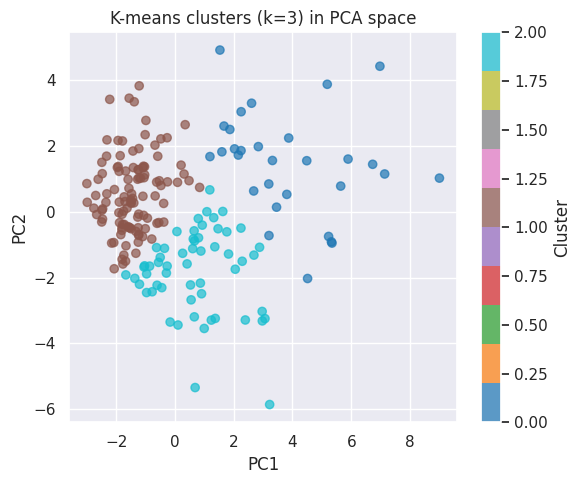

In [21]:
plt.figure(figsize=(6,5))
scatter = plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=clusters_train,
    cmap="tab10",
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clusters (k=3) in PCA space")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

In [22]:
# If you have a tuned model (e.g. best_rf), use that instead:
primary_model = rf        # or: primary_model = best_rf
primary_model_name = "Random Forest"

In [23]:
import pandas as pd

def get_patient_template():
    """
    Returns a dictionary with one default patient,
    using the median of each feature from the training set.
    You can then modify the values you care about.
    """
    median_vals = X_train.median()
    template = median_vals.to_dict()
    return template

# See what the template looks like
patient_template = get_patient_template()
patient_template

{'Gender': 2.0,
 'Age': 80.0,
 'ASA': 2.0,
 'Anesthesia': 2.0,
 'Height': 158.0,
 'Weight': 56.5,
 'BMI': 22.4618259982957,
 'HTN': 1.0,
 'DM': 0.0,
 'CAD': 0.0,
 'Stroke': 0.0,
 'Diagnosis': 2.0,
 'Surgery': 3.0,
 'DuraSurg': 80.0,
 'DuraAnes': 163.0,
 'Infusion': 1000.0,
 'Blood loss': 100.0,
 'Urine Output': 100.0,
 'Intraop CRC': 0.0,
 'Intraop FFP': 0.0,
 'Postop CRC': 0.0,
 'Postop FFP': 0.0,
 'Intraop Blood product': 0.0,
 'Postop Blood product': 0.0,
 'Blood product': 0.0,
 'Vasopressor': 0.0,
 'ICU': 0.0,
 'Pneumonia': 0.0,
 'DVT／PE': 0.0,
 'Preparation days': 4.0,
 'Postop Length of Stay': 8.0,
 'Frailty Index': 2.0,
 'Hct': 0.3305,
 'Alb': 36.1,
 'Cre': 62.5}

In [24]:
def predict_delirium_primary(patient_features: dict):
    """
    Takes a dictionary of patient features and returns:
      - predicted class (0 = no delirium, 1 = delirium)
      - predicted probability of delirium (0–1)
    Uses the chosen primary_model (Random Forest).
    """
    # 1. Convert dict -> one-row DataFrame
    X_new = pd.DataFrame([patient_features])

    # 2. Ensure same column order as training data
    X_new = X_new[feature_cols]

    # 3. Predict class and probability
    y_pred = primary_model.predict(X_new)[0]
    y_proba = primary_model.predict_proba(X_new)[0, 1]  # probability of class "1" (delirium)

    return y_pred, y_proba

In [25]:
# Start from the median template
low_risk_patient = get_patient_template()

# Adjust some key fields for a low-risk profile
low_risk_patient["Age"] = 70
low_risk_patient["Frailty Index"] = 0.15
low_risk_patient["ICU"] = 0   # no ICU stay
# You can tweak more fields if you like

pred_class_low, pred_proba_low = predict_delirium_primary(low_risk_patient)

print("Low-risk patient prediction:")
print("  Predicted class (0=no delirium, 1=delirium):", pred_class_low)
print("  Predicted probability of delirium:", round(pred_proba_low, 3))

Low-risk patient prediction:
  Predicted class (0=no delirium, 1=delirium): 0
  Predicted probability of delirium: 0.057


In [26]:
# Start from the same template
high_risk_patient = get_patient_template()

# Adjust key fields for a clearly high-risk profile
high_risk_patient["Age"] = 88
high_risk_patient["Frailty Index"] = 0.45
high_risk_patient["ICU"] = 1   # went to ICU
high_risk_patient["Hct"] = 28  # low hematocrit
high_risk_patient["Alb"] = 2.80 # low albumin
# tweak other features if needed

pred_class_high, pred_proba_high = predict_delirium_primary(high_risk_patient)

print("\nHigh-risk patient prediction:")
print("  Predicted class (0=no delirium, 1=delirium):", pred_class_high)
print("  Predicted probability of delirium:", round(pred_proba_high, 3))


High-risk patient prediction:
  Predicted class (0=no delirium, 1=delirium): 0
  Predicted probability of delirium: 0.233
